In [2]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [3]:
df_population = pd.read_csv("Population_growth.csv")

In [4]:
df_population = df_population.loc[4:]

In [5]:
df_population.rename(columns={'Data Source':'Country Name',
                        'Unnamed: 4':'1960',
                        'Unnamed: 5':'1961',
                        'Unnamed: 6':'1962',
                        'Unnamed: 7':'1963',
                        'Unnamed: 8':'1964',
                        'Unnamed: 9':'1965',
                        'Unnamed: 10':'1966',
                        'Unnamed: 11':'1967',
                        'Unnamed: 12':'1968',
                        'Unnamed: 13':'1969',
                        'Unnamed: 14':'1970',
                        'Unnamed: 15':'1971',
                        'Unnamed: 16':'1972',
                        'Unnamed: 17':'1973',
                        'Unnamed: 18':'1974',
                        'Unnamed: 19':'1975',
                        'Unnamed: 20':'1976',
                        'Unnamed: 21':'1977',
                        'Unnamed: 22':'1978',
                        'Unnamed: 23':'1979',
                        'Unnamed: 24':'1980',
                        'Unnamed: 25':'1981',
                        'Unnamed: 26':'1982',
                        'Unnamed: 27':'1983',
                        'Unnamed: 28':'1984',
                        'Unnamed: 29':'1985',
                        'Unnamed: 30':'1986',
                        'Unnamed: 31':'1987',
                        'Unnamed: 32':'1988',
                        'Unnamed: 33':'1989',
                        'Unnamed: 34':'1990',
                        'Unnamed: 35':'1991',
                        'Unnamed: 36':'1992',
                        'Unnamed: 37':'1993',
                        'Unnamed: 38':'1994',
                        'Unnamed: 39':'1995',
                        'Unnamed: 40':'1996',
                        'Unnamed: 41':'1997',
                        'Unnamed: 42':'1998',
                        'Unnamed: 43':'1999',
                        'Unnamed: 44':'2000',
                        'Unnamed: 45':'2001',
                        'Unnamed: 46':'2002',
                        'Unnamed: 47':'2003',
                        'Unnamed: 48':'2004',
                        'Unnamed: 49':'2005',
                        'Unnamed: 50':'2006',
                        'Unnamed: 51':'2007',
                        'Unnamed: 52':'2008',
                        'Unnamed: 53':'2009',
                        'Unnamed: 54':'2010',
                        'Unnamed: 55':'2011',
                        'Unnamed: 56':'2012',
                        'Unnamed: 57':'2013',
                        'Unnamed: 58':'2014',
                        'Unnamed: 59':'2015',
                        'Unnamed: 60':'2016',
                        'Unnamed: 61':'2017',
                        'Unnamed: 62':'2018'},
                 inplace=True)

In [6]:
df_population = df_population.set_index('Country Name')

In [7]:
df_population.to_excel("population_growth_new.xlsx")

In [8]:
y = range(1960,2018)

In [9]:
z = list(df_population.loc['India'][3:])

In [10]:
z = pd.DataFrame(z, columns = ['pop_value'])

In [11]:
z['year'] = range(1960,2019)

In [10]:
#z = z.set_index('year')

In [12]:
len(z)

59

In [13]:
z.head()

,pop_value,year
0,450547679.0,1960
1,459642165.0,1961
2,469077190.0,1962
3,478825608.0,1963
4,488848135.0,1964


In [14]:
z1 = z.set_index('year')

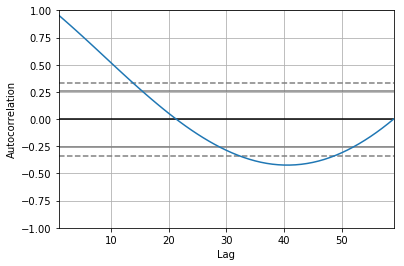

In [15]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(z1)
pyplot.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(z.pop_value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 1st order differencing
result = adfuller(z.pop_value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 2st order differencing
result = adfuller(z.pop_value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 3rd order differencing
result = adfuller(z.pop_value.diff().diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 4th order differencing
result = adfuller(z.pop_value.diff().diff().diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.927769
p-value: 0.778690
ADF Statistic: -1.843521
p-value: 0.359079
ADF Statistic: -1.314702
p-value: 0.622419
ADF Statistic: -1.595112
p-value: 0.486048
ADF Statistic: -3.563679
p-value: 0.006495


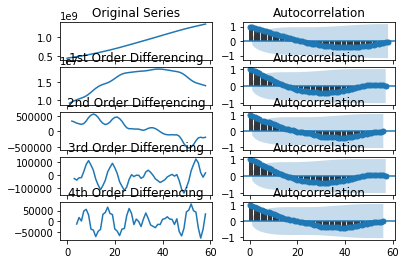

In [17]:
# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(z.pop_value); axes[0, 0].set_title('Original Series')
plot_acf(z.pop_value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(z.pop_value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(z.pop_value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(z.pop_value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(z.pop_value.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(z.pop_value.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(z.pop_value.diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(z.pop_value.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(z.pop_value.diff().diff().dropna(), ax=axes[4, 1])

plt.show()

In [18]:
# d = 4

C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


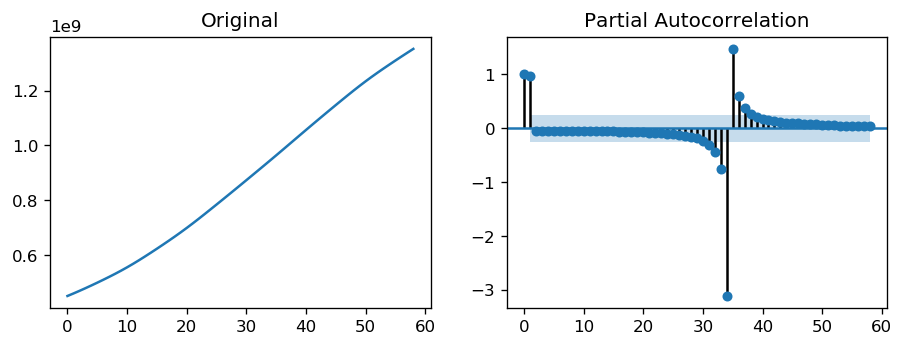

In [19]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value) ; axes[0].set_title('Original')
plot_pacf(z.pop_value, ax=axes[1])

plt.show()

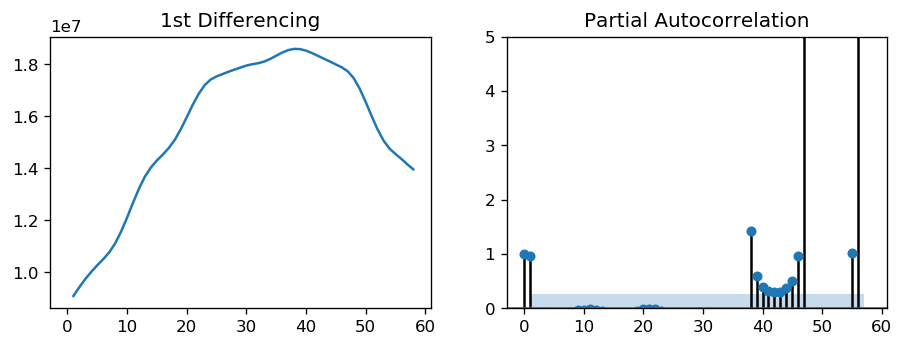

In [20]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(z.pop_value.diff().dropna(), ax=axes[1])

plt.show()

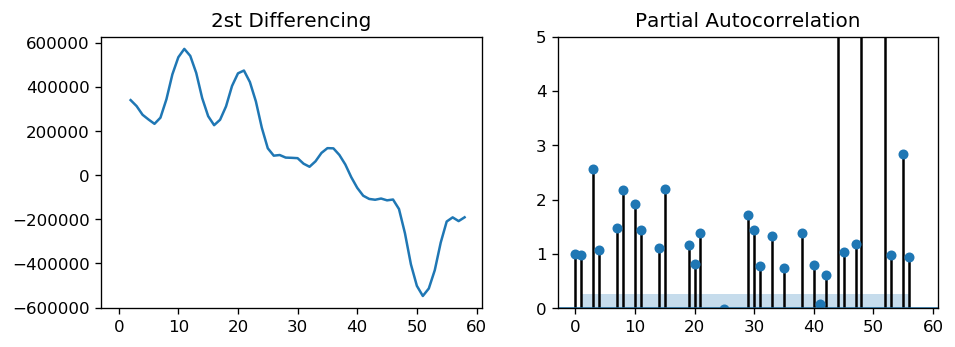

In [21]:
# PACF plot of 2nd differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value.diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(z.pop_value.diff().diff().dropna(), ax=axes[1])

plt.show()

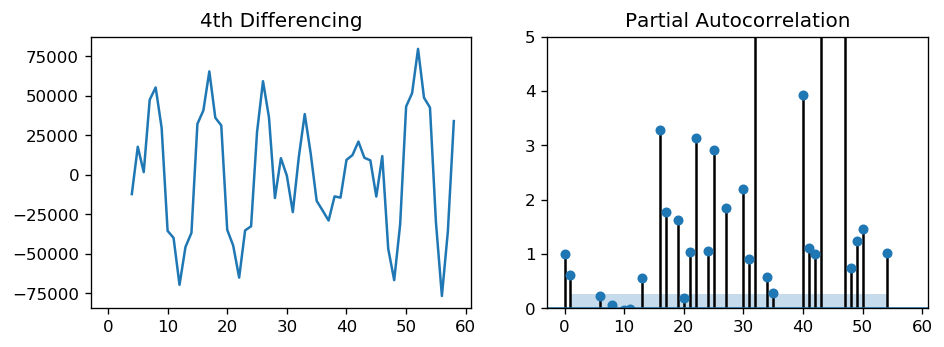

In [22]:
# PACF plot of 4th differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value.diff().diff().diff().diff()); axes[0].set_title('4th Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(z.pop_value.diff().diff().diff().diff().dropna(), ax=axes[1])

plt.show()

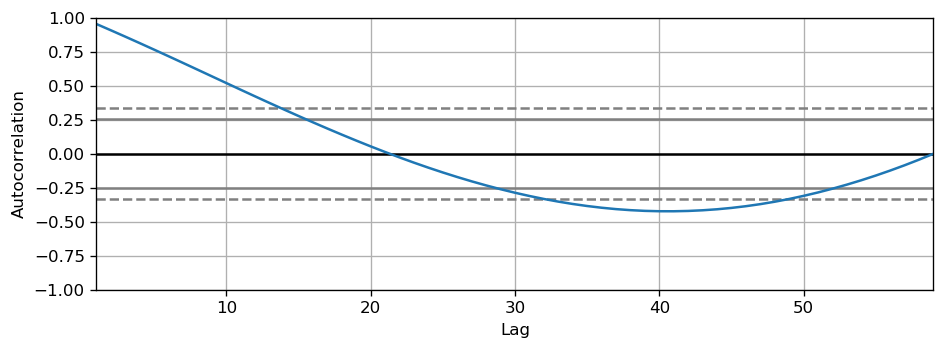

In [23]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(z.pop_value)
pyplot.show()

In [24]:
# p = 13

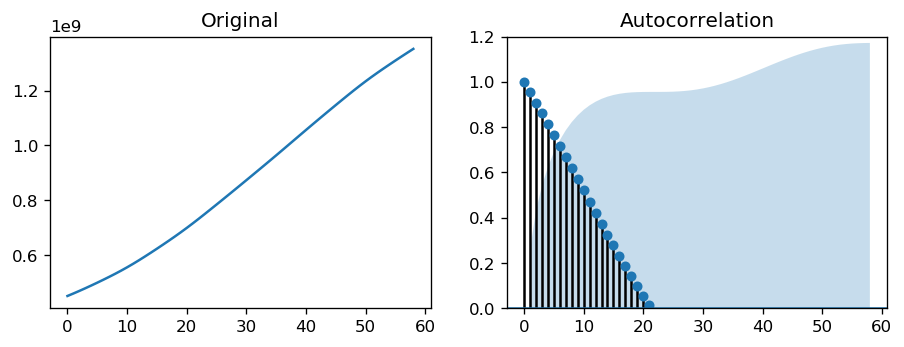

In [25]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value); axes[0].set_title('Original')
axes[1].set(ylim=(0,1.2))
plot_acf(z.pop_value.dropna(), ax=axes[1])

plt.show()

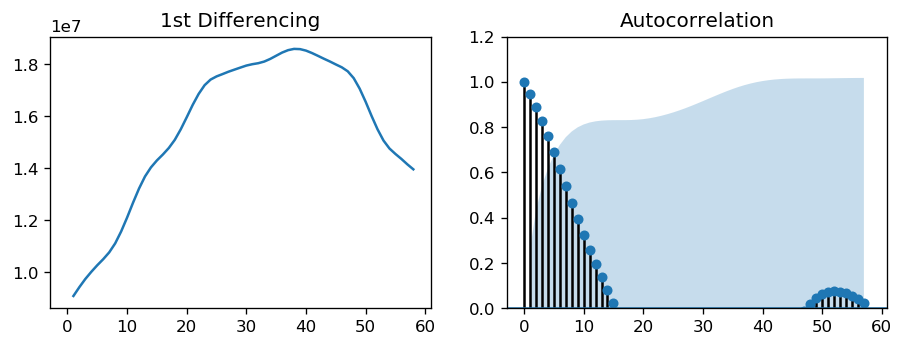

In [26]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(z.pop_value.diff().dropna(), ax=axes[1])

plt.show()

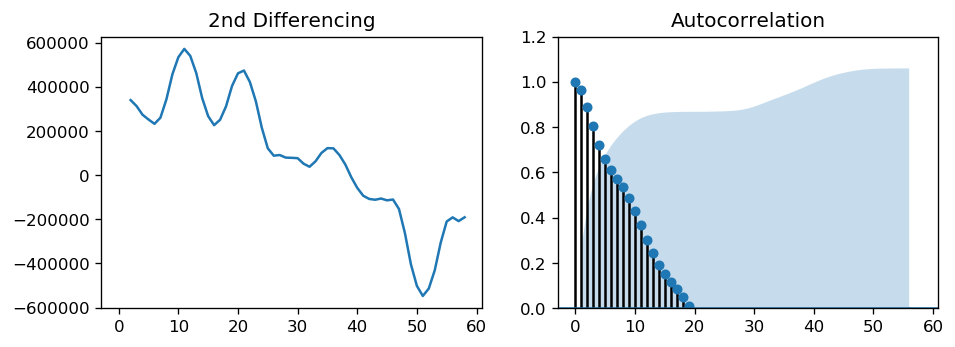

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(z.pop_value.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(z.pop_value.diff().diff().dropna(), ax=axes[1])

plt.show()

In [28]:
# q = 1

In [29]:
# ARIMA(1,4,1)

In [30]:
# Exponential smoothing

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# 0,1,1 ARIMA Model
model = ARIMA(z1, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.pop_value   No. Observations:                   58
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -907.302
Method:                       css-mle   S.D. of innovations        1452925.381
Date:                Wed, 20 Nov 2019   AIC                           1820.604
Time:                        06:38:39   BIC                           1826.785
Sample:                             1   HQIC                          1823.012
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.555e+07   3.79e+05     41.084      0.000    1.48e+07    1.63e+07
ma.L1.D.pop_value     0.9999      0.043     23.396      0.000       0.916       1.084
                        

C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pooji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


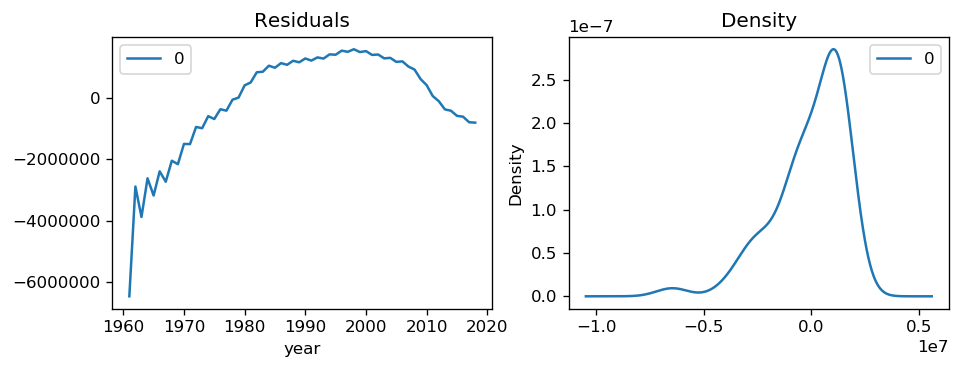

In [32]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

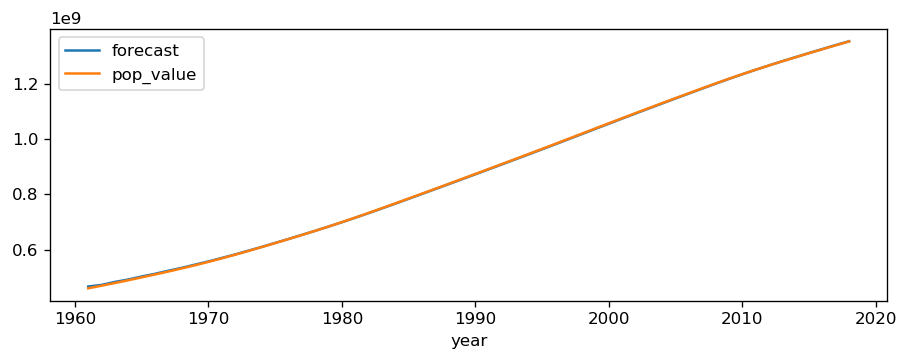

In [33]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [34]:
# 59 -> 2018
# 60 -> 2019, 70 -> 2029, 71 -> 2030

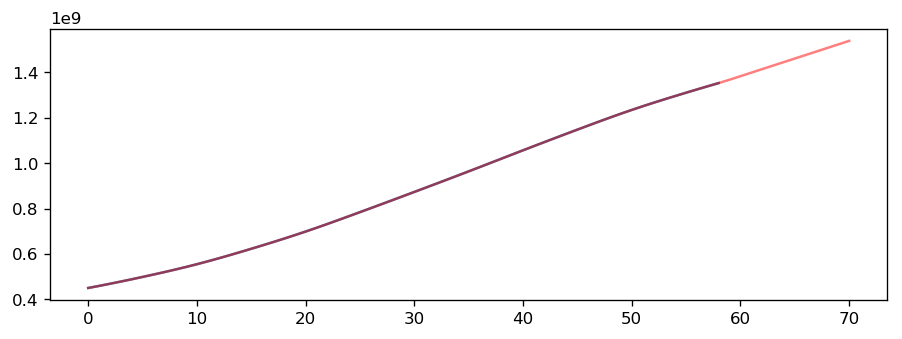

In [42]:
X = z1.values
X = [int(x) for x in X]
history = [int(x) for x in X]
predictions = list(history)

for t in range(60,72):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = int(output[0])
    predictions.append(yhat)
    history.append(yhat)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red', alpha=0.5)
pyplot.show()

In [36]:
df_pop_val = pd.DataFrame(predictions, columns = ['pop_val_predictions'])

In [37]:
df_pop_val['year'] = list(range(1960,2031))

In [43]:
df_pop_val.to_excel("population_growth_forecast_1960-2030_India.xlsx")